Outline of steps taken in the project
1. The tools are SQL, Python and Jupiter Notebook. The local data used in this project is Columbus data.
2. In order to calculate Moving Average Temperature, I used "rolling function" in Pandas library. After trying a couple different options of time frame, I chose 50 years rolling period because it smooths out data and helps me observe the long term trend better. 
3. For visualization purpose, I used line chart to show the fluctuations of moving average temperature in both local and global data. Histograms were created to show the most frequent moving average temperature in each location for comparision. In addition, I used scatterplot to visualize relationship between those two variables. Finally, I ran corr() function in Pandas to see the correlation coefficient for Average temperature between local and global data.

Observations
1. Overall, the moving average temperature in both local and global data inscreased gradually. This implies global warming happening !
2. Looking at the line chart, we can see the opposite temperature trend between global and local data in the same period of time. For instance, during 1825-1845 local data rose slightly from 13.51 to 13.88 Celsius while global data dropped from 8.06 to 7.92 Celsius. The period starting from 1845 to 1855, the local moving average temperature were fairly steady at 13.88 Celsius while global data kept declining. The Moving average temperature in local data fell significantly from 1875 to 1925 while the global temperature increased slowly.
3. Histagram shows global moving average temperature are better spread out than local data. The distribution of local moving average temperature mostly focused on 13-15 celsius while it is 8.25-9 Celsius for global data. 
4. The correlation coefficient of Average temperature between local and global is 0.49 which indicates a moderate positive linear relationship- the two variables has little impact on each other. I tried to build model in linear regression but R squared is only 0.24 meaning the model can only explain 24 percent of given data.


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Pulling local and global data:

In [79]:
localtemp = pd.read_csv('C:/Users/clair/Desktop/Udacity/localtemp.csv')   
localtemp

,year,city,country,avg_temp
0,1743,Columbus,United States,7.46
1,1744,Columbus,United States,15.73
2,1745,Columbus,United States,6.91
3,1746,Columbus,United States,NaN
4,1747,Columbus,United States,NaN
...,...,...,...,...
266,2009,Columbus,United States,14.46
267,2010,Columbus,United States,14.64
268,2011,Columbus,United States,15.24
269,2012,Columbus,United States,15.91


In [80]:
globaltemp = pd.read_csv('C:/Users/clair/Desktop/Udacity/globaltemp.csv')
globaltemp

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [86]:
localtemp.describe()

,year,avg_temp
count,271.000000,266.000000
mean,1878.000000,13.941090
std,78.375166,1.107914
min,1743.000000,6.060000
25%,1810.500000,13.582500
50%,1878.000000,14.070000
75%,1945.500000,14.450000
max,2013.000000,16.050000


In [87]:
globaltemp.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


Finding any missing values in both data set:

In [88]:
localtemp.isnull().values.any()

True

In [89]:
globaltemp.isnull().values.any()

False

In [90]:
localtemp.isnull().sum()

year        0
city        0
country     0
avg_temp    5
dtype: int64

In [91]:
localtemp1=localtemp.fillna(localtemp.median())

Merge two data set into one by joining on year column:

In [7]:
fulldata=pd.merge(localtemp1,globaltemp,on='year',how='inner')
fulldata

,year,city,country,avg_temp_x,avg_temp_y
0,1750,Columbus,United States,14.62,8.72
1,1751,Columbus,United States,15.36,7.98
2,1752,Columbus,United States,8.30,5.78
3,1753,Columbus,United States,14.00,8.39
4,1754,Columbus,United States,14.11,8.47
...,...,...,...,...,...
259,2009,Columbus,United States,14.46,9.51
260,2010,Columbus,United States,14.64,9.70
261,2011,Columbus,United States,15.24,9.52
262,2012,Columbus,United States,15.91,9.51


Creating Moving Average Temperature for both local and global data:

In [94]:
fulldata['Moving_Avg_local_50']=np.round(fulldata.iloc[:,3].rolling(window=50).mean(),2)
fulldata['Moving_Avg_global_50']=np.round(fulldata.iloc[:,4].rolling(window=50).mean(),2)
fulldata

,year,city,country,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
0,1750,Columbus,United States,14.62,8.72,NaN,NaN
1,1751,Columbus,United States,15.36,7.98,NaN,NaN
2,1752,Columbus,United States,8.30,5.78,NaN,NaN
3,1753,Columbus,United States,14.00,8.39,NaN,NaN
4,1754,Columbus,United States,14.11,8.47,NaN,NaN
...,...,...,...,...,...,...,...
259,2009,Columbus,United States,14.46,9.51,14.37,8.97
260,2010,Columbus,United States,14.64,9.70,14.39,8.99
261,2011,Columbus,United States,15.24,9.52,14.42,9.01
262,2012,Columbus,United States,15.91,9.51,14.46,9.02


Creating visualization for the final data set:

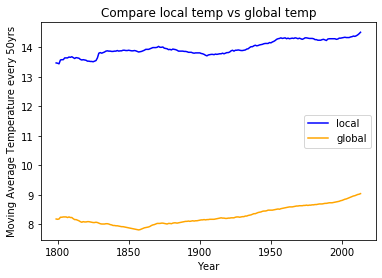

In [95]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fulldata['year'],fulldata['Moving_Avg_local_50'],'blue',label='local')
ax.plot(fulldata['year'],fulldata['Moving_Avg_global_50'],'orange',label='global')
ax.set(xlabel='Year', ylabel='Moving Average Temperature every 50yrs',title='Compare local temp vs global temp')
plt.legend();

Pulling out detail for specific years:

In [96]:
fulldata.loc[fulldata['year']==1825]

,year,city,country,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
75,1825,Columbus,United States,14.66,8.39,13.51,8.06


In [97]:
fulldata.loc[fulldata['year']==1845]

,year,city,country,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
95,1845,Columbus,United States,14.29,7.85,13.88,7.92


In [98]:
fulldata.loc[fulldata['year']==1875]

,year,city,country,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
125,1875,Columbus,United States,13.05,7.86,13.97,8.03


In [99]:
fulldata.loc[fulldata['year']==1925]

,year,city,country,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
175,1925,Columbus,United States,14.53,8.53,13.9,8.24


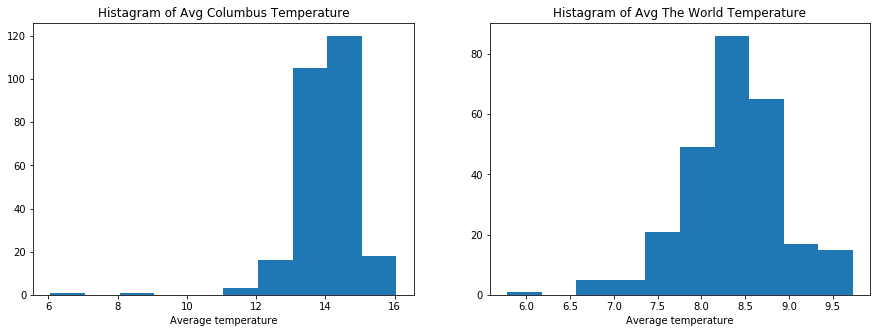

In [100]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist('avg_temp_x',data=fulldata)
ax[1].hist('avg_temp_y',data=fulldata)
ax[0].set(xlabel='Average temperature', title='Histagram of Avg Columbus Temperature')
ax[1].set(xlabel='Average temperature', title='Histagram of Avg The World Temperature');

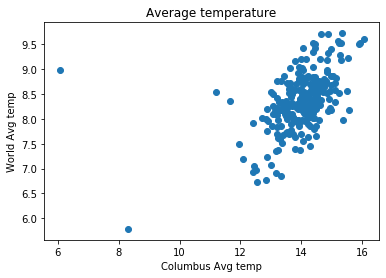

In [81]:
fig = plt.figure()
ax = plt.axes()
ax.scatter('avg_temp_x','avg_temp_y',data=fulldata)
ax.set(title='Average temperature',xlabel='Columbus Avg temp',ylabel='World Avg temp');

Finding correlation coefficient between the two variables: Local Average temperature vs Global Average temperature

In [101]:
fulldata.corr(method ='pearson') 

,year,avg_temp_x,avg_temp_y,Moving_Avg_local_50,Moving_Avg_global_50
year,1.000000,0.387033,0.612115,0.887410,0.862293
avg_temp_x,0.387033,1.000000,0.494573,0.399151,0.428300
avg_temp_y,0.612115,0.494573,1.000000,0.690723,0.779109
Moving_Avg_local_50,0.887410,0.399151,0.690723,1.000000,0.786189
Moving_Avg_global_50,0.862293,0.428300,0.779109,0.786189,1.000000


Building and testing linear regression model:

In [102]:
x= fulldata[['avg_temp_x']]
y= fulldata['avg_temp_y']
lm.fit(x,y)
lm.score(x,y)

0.24460230216862